In [103]:
import numpy as np
import pandas as pd
import scipy.io
import os,re

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

In [2]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

#read SA data
dfSA = pd.read_excel(dataFolder+'/2.4 Utilities/03. Utilities Distribution/utility_mapping_M1B_labels-16-Feb-2023.xlsx')
sax = np.array(dfSA['x_m']) #in M1B
say = np.array(dfSA['y_m'])
saz = np.array(dfSA['z_m'])
saID = np.array(dfSA['LSNo'])
saReqMaxFx_N = np.array(dfSA['ReqMaxFx_N']) #max Fx the SA is allowed to produce??
print('N actuators = ', len(dfSA))

#read Afz (Fz influence matrix)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Afz-whp-09-Aug-2023.csv', header=None)
Afz = np.array(df)
print('Afz = ',Afz.shape)
# this is Afz only; it is 27685 x 170.

#read Afx (Fx influence matrix)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Afx-whp-09-Aug-2023.csv', header=None)
Afx = np.array(df)
print('Afx = ', Afx.shape)

#read Afy (Fy influence matrix)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Afy-whp-09-Aug-2023.csv', header=None)
Afy = np.array(df)
print('Afy = ', Afy.shape)

#read FEA nodes data
mat = scipy.io.loadmat(dataFolder+'/influnce_matrix_files/NodeXYZsurface_meters.mat')
nodeID = mat['NodeXYZsurface_meters'][:,0]
nodex = mat['NodeXYZsurface_meters'][:,2] #swap x/y to get to M1B
nodey = mat['NodeXYZsurface_meters'][:,1]
nodez = mat['NodeXYZsurface_meters'][:,3]
print('N node = ', len(nodeID))

N actuators =  170
Afz =  (27685, 176)
Afx =  (27685, 176)
Afy =  (27685, 176)
N node =  27685


In [3]:
nact = len(dfSA)

In [4]:
df = np.loadtxt('HP_xy.txt') #from Trupti email, in M1B
hpx = df[:,0]
hpy = df[:,1]

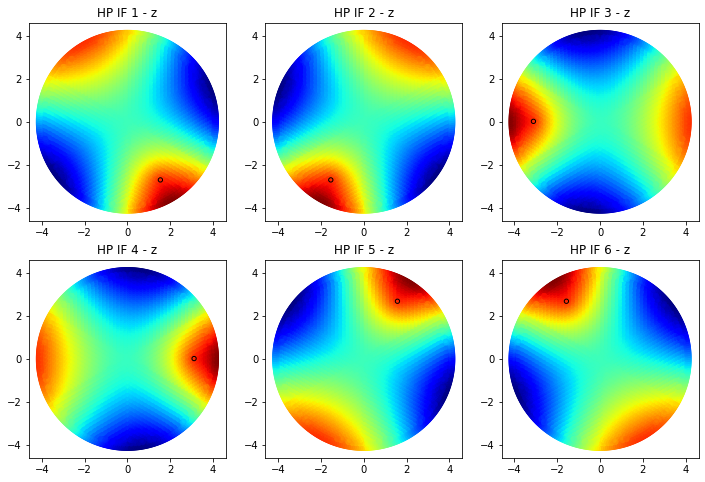

In [6]:
nrow = 2
fig, ax = plt.subplots(nrow,3,figsize=(12,4*nrow))
i = 0
for HPID in range(1,3*nrow+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Afz[:,HPID-1+nact])
    circle = plt.Circle((hpx[HPID-1], hpy[HPID-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].set_title('HP IF %d - z'%HPID)

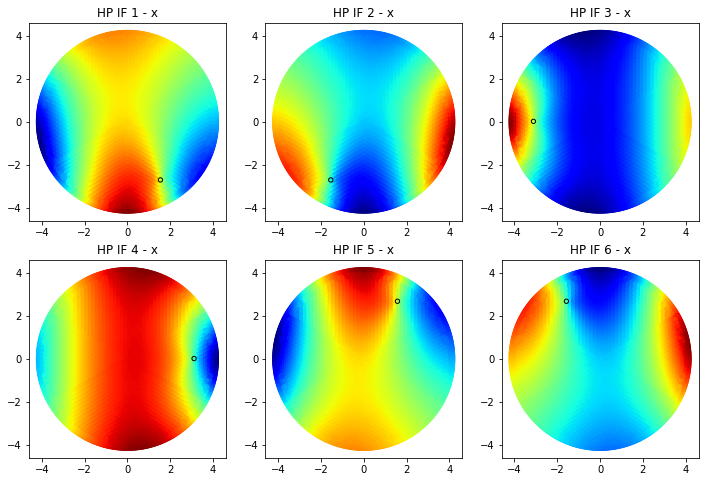

In [7]:
nrow = 2
fig, ax = plt.subplots(nrow,3,figsize=(12,4*nrow))
i = 0
for HPID in range(1,3*nrow+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Afx[:,HPID-1+nact])
    circle = plt.Circle((hpx[HPID-1], hpy[HPID-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].set_title('HP IF %d - x'%HPID)

(-4.599069034, 4.599063954, -4.599119326, 4.599114246)

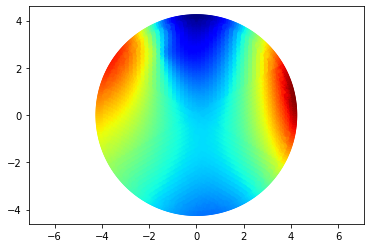

In [8]:
plt.scatter(nodex, nodey, 10, Afx[:,175])
plt.axis('equal')

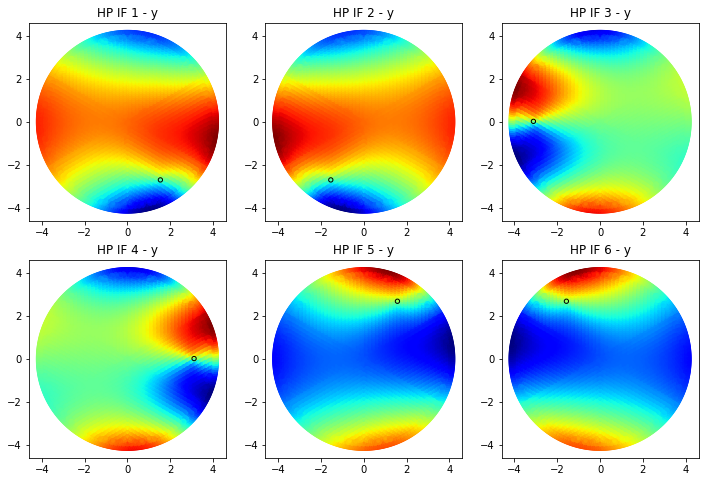

In [9]:
nrow = 2
fig, ax = plt.subplots(nrow,3,figsize=(12,4*nrow))
i = 0
for HPID in range(1,3*nrow+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Afy[:,HPID-1+nact])
    circle = plt.Circle((hpx[HPID-1], hpy[HPID-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].set_title('HP IF %d - y'%HPID)

### For the z forces, what would be the force set that produces these shapes?

The forward multiplication S = influenceMat*[0 0 1 0 ... 0] filtered out the piston, tilt, etc. Can we predict the balanced forces that would produce S? does it agree with the K matrix?

(-4.599069034, 4.599063954, -4.599119326, 4.599114246)

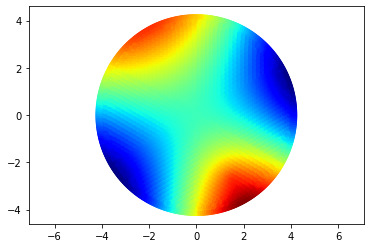

In [80]:
HPID = 0
plt.scatter(nodex, nodey, 10, Afz[:, nact+HPID])
plt.axis('equal')

In [81]:
colList = list(range(nact))
colList.append(nact+HPID)
print(colList)
myAfz = Afz[:, colList]
print(myAfz.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
(27685, 171)


In [31]:
myF = np.linalg.pinv(myAfz)@Afz[:,nact+HPID]

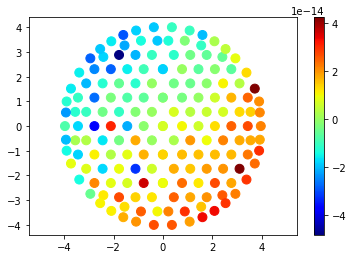

In [35]:
plt.scatter(sax, say, 80, myF[:nact])
plt.axis('equal')
plt.colorbar()

In [36]:
print(myF[nact+HPID])

1.000000000000027


In [37]:
sum(myF)

1.0000000000006675

too good. Let's do our own matrix inversion.

In [38]:
U, S, Vh = np.linalg.svd(myAfz)

In [84]:
V = Vh.transpose()
len(S)

171

In [70]:
Sinv = np.zeros((len(S), len(S)))
for i in range(len(S)):
    Sinv[i,i] = 1./S[i]

5


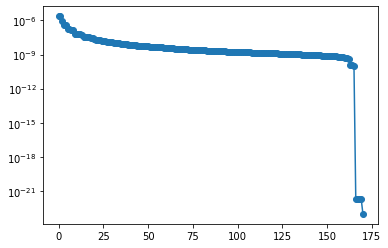

In [74]:
plt.semilogy(S, '-o')
print(sum(S<1e-12))

5


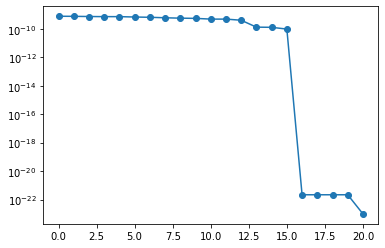

In [82]:
plt.semilogy(S[150:], '-o')
print(sum(S<1e-12))

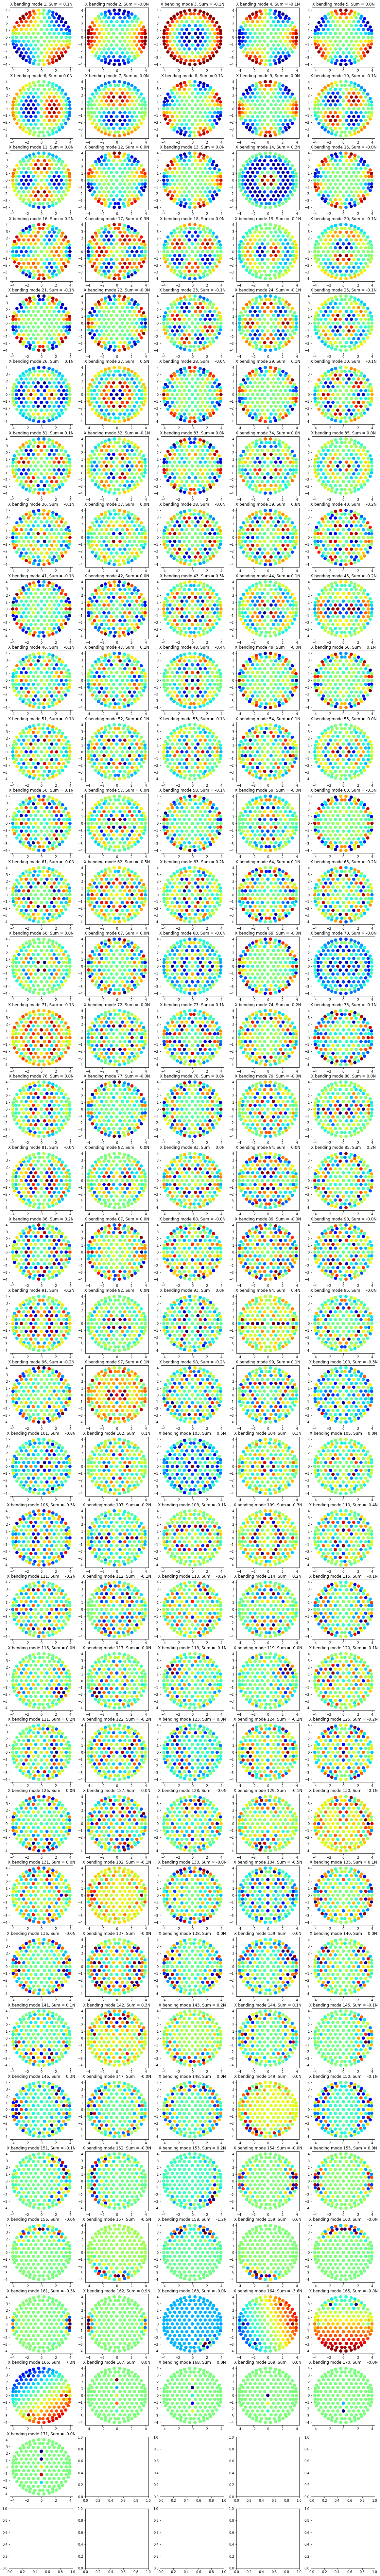

In [99]:
nrow = 36
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    if modeID <= nact+1:
        irow = np.int8(i/5)
        icol = np.mod(i,5)
        i += 1

        img = ax[irow][icol].scatter(sax, say,80, V[:-1,modeID-1])
        ax[irow][icol].set_title('X bending mode %d, Sum = %.1fN'%(modeID, np.sum(V[:,modeID-1])))

In [79]:
Sinv[nact+1-3:, nact+1-3:] = 0
print(Sinv[nact+1-3:, nact+1-3:].shape)

(3, 3)


In [76]:
myF1 = Vh.transpose()@ Sinv@ U[:,:(nact+1)].transpose() @Afz[:,nact+0]

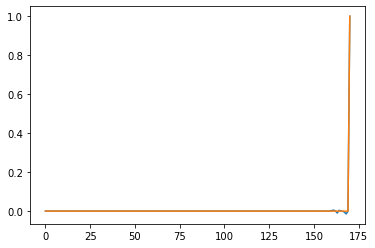

In [77]:
plt.plot(myF1)
plt.plot(myF)

In [78]:
sum(myF1)

0.9833679199223863

In [64]:
Sinv[nact-6:, nact-6:].shape

(7, 7)

something is not quite right. The last a few V vectors - should I expect them to be piston, tip, and tilt? but they are not. Maybe there is something I don't understand about the SVD in numpy.

### Let's do a forward prediction using the K-matrix, and predict the HP IFs in two ways (1) Afz and (2) K-matrix, and see if they agree.

In [104]:
ctrlFolder = '/Users/bxin/wavefront/ocs_m1_dcs/src/etc/conf/m1_ctrl_pkg/m1_support_ctrl/'
FB_K_file = 'm1_force_distribution_matrix_conf.coffee'
filename = os.path.join(ctrlFolder, FB_K_file)

fid = open(filename)
KMat = np.zeros((170*3, 6))
i = 0
for line in fid:
    if len(line)>50:
        a = re.split('\[|]|,',line)
        a = [x for x in a if (x and not x.isspace() and x!='\n')]
        KMat[i,:] = a
        i += 1

In [105]:
KMat.shape

(510, 6)

In [108]:
netFM = np.zeros(6)
if HPID == 0:
    netFM[2] = 1 #Fz
    netFM[3] = 1*hpy[HPID]#Rx
    netFM[4] = -1*hpx[HPID] #Ry

In [110]:
myFF = KMat @ netFM

In [111]:
myFF.shape

(510,)

In [116]:
myFFx = np.array([myFF[3*i] for i in range(170)])
myFFy = np.array([myFF[3*i+1] for i in range(170)])
myFFz = np.array([myFF[3*i+2] for i in range(170)])

-0.9999960444529645


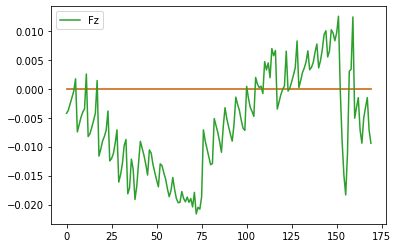

In [130]:
plt.plot(myFFx)
plt.plot(myFFy)
plt.plot(myFFz,label='Fz')
plt.legend();
print(sum(myFFz))

impact of all the balance forces

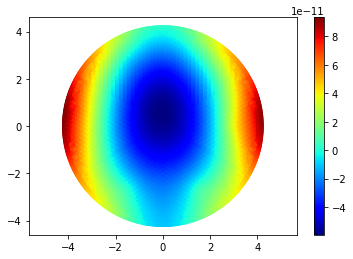

In [131]:
HPID = 0
plt.scatter(nodex, nodey, 10, Afz[:,:nact]@myFFz)
plt.axis('equal')
plt.colorbar()

Balance forces together with the "poke" by the single HP

In [122]:
mySS = Afz[:, colList] @ np.append(myFFz,1)

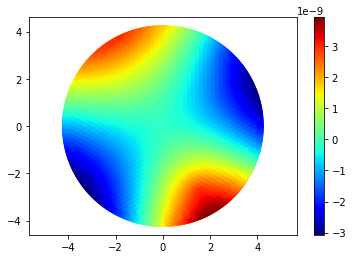

In [127]:
HPID = 0
plt.scatter(nodex, nodey, 10, mySS)
plt.axis('equal')
plt.colorbar()

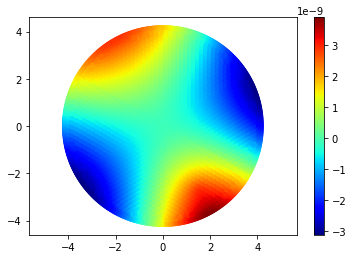

In [129]:
HPID = 0
plt.scatter(nodex, nodey, 10, Afz[:, nact+HPID]) #replot what we had with inf*[00100...0]
plt.axis('equal')
plt.colorbar();

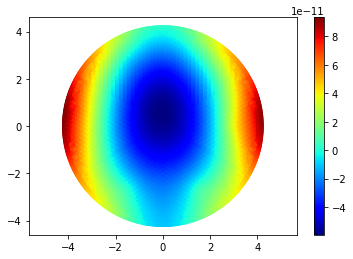

In [132]:
HPID = 0
plt.scatter(nodex, nodey, 10, mySS - Afz[:, nact+HPID])
plt.axis('equal')
plt.colorbar()